<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков-и-разбиение-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Создание-признаков-и-разбиение-на-обучающую-и-тестовую-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание признаков и разбиение на обучающую и тестовую выборки</a></span></li><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LightGBMRegressor" data-toc-modified-id="LightGBMRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LightGBMRegressor</a></span></li><li><span><a href="#DummyRegressor" data-toc-modified-id="DummyRegressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>DummyRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LightGBMRegressor" data-toc-modified-id="LightGBMRegressor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LightGBMRegressor</a></span></li><li><span><a href="#DummyRegressor" data-toc-modified-id="DummyRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>DummyRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
df_taxi = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

#df_taxi = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])

Изучим данные:

In [4]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
df_taxi.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
df_taxi.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Отсортируем данные по порядку, а также выполним их ресемплирование по одному часу:

In [7]:
df_taxi.sort_index(inplace=True)
df_taxi = df_taxi.resample('1H').sum()

In [8]:
# проверим, в хронологическом ли порядке расположены даты и время
print(df_taxi.index.is_monotonic)

True


In [9]:
df_taxi.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


### Вывод

Были загружены данные о количестве заказов с интервалом в 10 минут, данные были ресемплированы по одному часу.

## Анализ

Начнем анализ данных:

<AxesSubplot:xlabel='datetime'>

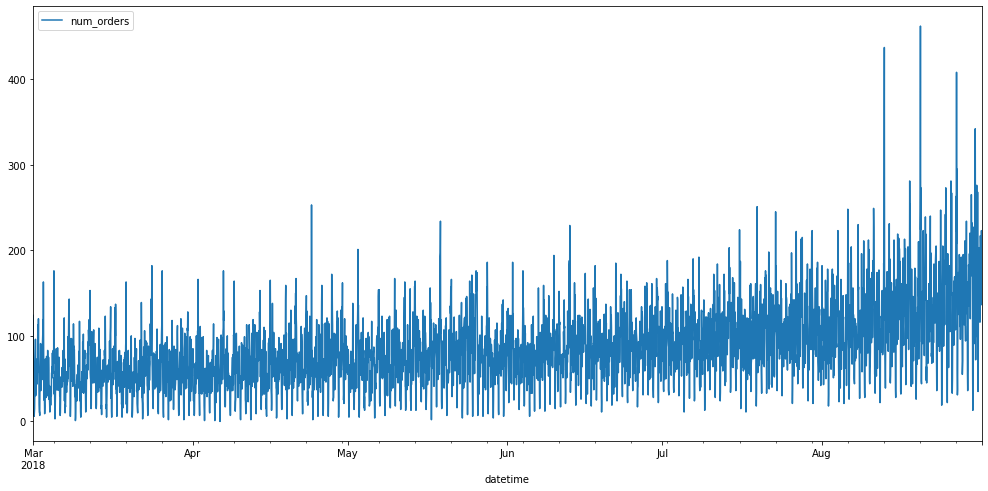

In [10]:
df_taxi.plot(figsize=(17,8))

Данные представлены с марта 2018 года по сентябрь 2018 года.

Посмотрим на тренды и сезонность:

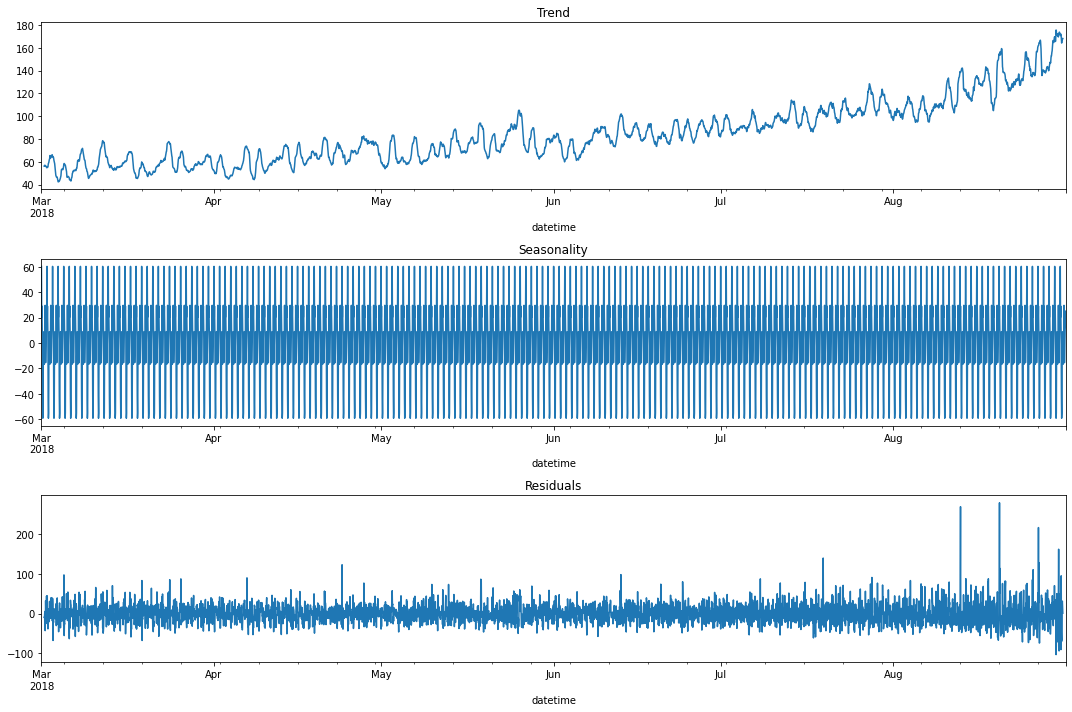

In [11]:
decomposed = seasonal_decompose(df_taxi) 

plt.figure(figsize=(15, 10))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca())  
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

Можно заметить тренд на увеличение количества заказов, возможно, связанные с тем, что люди возвращаются из отпуска и берут больше такси из аэропорта. Также наблюдается некоторая сезонность, нужно построить другой график, чтобы понять, от чего она зависит.

Text(0.5, 1.0, 'Seasonality june')

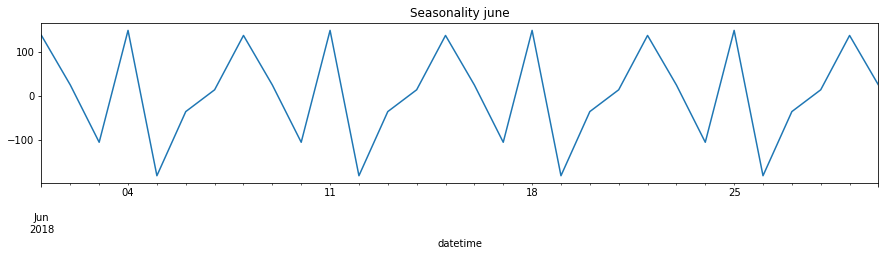

In [12]:
df_taxi_day = df_taxi.resample('1D').sum()
decomposed_day = seasonal_decompose(df_taxi_day)

plt.figure(figsize=(15, 10))
plt.subplot(311)

decomposed_day.seasonal['2018-06-01':'2018-06-30'].plot(ax=plt.gca())  
plt.title('Seasonality june')

Можно заметить, что в воскресенье такси не востребовано, в отличие от, например, субботы. 

Нам могут понадобится признаки:
 * день недели - так как в середине недели и к концу недели такси более востребовано;
 * месяц - так как количество заказов с каждым месяцем увеличивается
 

Проверим, станет ли ряд стационароным, если добавить разности значений:

<AxesSubplot:xlabel='datetime'>

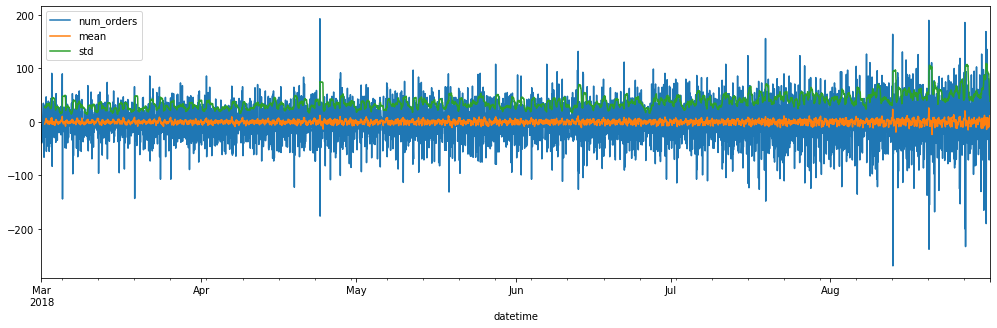

In [13]:
df_taxi_shift = df_taxi - df_taxi.shift() 
df_taxi_shift['mean'] = df_taxi_shift['num_orders'].rolling(15).mean()
df_taxi_shift['std'] = df_taxi_shift['num_orders'].rolling(15).std()

plt.figure(figsize=(17, 17))
plt.subplot(311)
df_taxi_shift.plot(ax=plt.gca())

### Вывод

В данных наблюдаются тренды и сезонность - количество заказов со временем увеличивается, а также зависит от дня недели.

Разности временного ряда показывают, что данные можно спрогнозировать. 

## Обучение

### Создание признаков и разбиение на обучающую и тестовую выборки

Для обучения моделей напишем функцию, которая создаст новые признаки:
* Значение месяца;
* Значение дня;
* Значение дня недели;
* Отстающие значения (предыдущие значения временного ряда подскажут, будет ли функция x(t) расти или уменьшаться);
* Скользящее среднее (задаёт общий тренд временного ряда).

In [14]:
def make_features(data,column, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[column].shift(lag)

    data['rolling_mean'] = data[column].shift().rolling(rolling_mean_size).mean()

In [15]:
make_features(df_taxi, 'num_orders', 25, 3)
df_taxi.head()

,num_orders,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.333333
2018-03-01 04:00:00,43,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000


Разделим данные на обучающую и тестовую выборки, а также удалим образовавшиеся пропуски:

In [16]:
train, test = train_test_split(df_taxi, shuffle=False, test_size=0.1, random_state=12345)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
features_test = test.drop('num_orders', axis=1)

target_train = train['num_orders']
target_test = test['num_orders']

In [17]:
print(train.shape)
print(test.shape)

(3949, 30)
(442, 30)


In [18]:
# Формула для получения значения RMSE
def rmse (target, predictions):
    return mean_squared_error(target, predictions)** 0.5

Для увеличения скорости обучения, гиперпараметры подобраны без применения GridSearch.

### Модель LinearRegression

In [32]:
%%time

lin_reg = LinearRegression(fit_intercept=False, n_jobs=-1)
lin_reg.fit(features_train, target_train)

print("RMSE обучающей выборке:", rmse(target_train, lin_reg.predict(features_train)))

RMSE обучающей выборки: 25.795442831884852
Wall time: 8.97 ms


In [61]:
dict_total = {}
dict_total["Linear Regression"] = [8.97, 25.795]

### RandomForestRegressor

In [31]:
%%time

many_tree = RandomForestRegressor(max_depth=20,
                                  min_samples_leaf=1,
                                  min_samples_split=3,
                                  n_estimators=500, 
                                  n_jobs=-1, random_state=12345)

many_tree.fit(features_train, target_train)
print("RMSE обучающей выборке:", rmse(target_train, many_tree.predict(features_train)))

RMSE обучающей выборки: 8.99763723162145
Wall time: 4.98 s


In [62]:
dict_total["RandomForestRegressor"] = [4980, 8.998]

### CatBoostRegressor

In [74]:
%%time
model_cat = CatBoostRegressor(loss_function='RMSE', 
                               depth=10,
                               border_count=32,
                               l2_leaf_reg=3,
                               learning_rate =0.1,
                               iterations=600,
                               eval_metric='RMSE',
                               thread_count=-1,
                               random_seed=12345) 

model_cat.fit(features_train, target_train, metric_period=200)

print("RMSE обучающей выборке:", rmse(target_train, model_cat.predict(features_train)))

0:	learn: 36.9263658	total: 8.54ms	remaining: 5.12s
200:	learn: 6.6346658	total: 1.15s	remaining: 2.29s
400:	learn: 2.1863588	total: 2.27s	remaining: 1.13s
599:	learn: 0.7723840	total: 3.4s	remaining: 0us
RMSE обучающей выборке: 0.772383974125708
Wall time: 3.58 s


In [63]:
dict_total["CatBoostRegressor"] = [3580, 0.772]

### LightGBMRegressor

In [39]:
%%time

model_lgbm = LGBMRegressor(num_leaves=100,
                           learning_rate=0.1,
                           n_estimators=900, 
                           n_jobs=-1,
                           random_state=12345) 

model_lgbm.fit(features_train, target_train)

print("RMSE обучающей выборке:", rmse(target_train, model_lgbm.predict(features_train)))

RMSE обучающей выборке: 0.28645523343525997
Wall time: 2.51 s


In [64]:
dict_total["LightGBMRegressor"] = [2510, 0.286]

### DummyRegressor

In [42]:
%%time

dummy_reg = DummyRegressor(strategy='median')
dummy_reg.fit(features_train, target_train)

print("RMSE обучающей выборке:", rmse(target_train, dummy_reg.predict(features_train)))

RMSE обучающей выборке: 38.8380551812372
Wall time: 1 ms


In [65]:
dict_total["DummyRegressor"] = [1, 38.838]

### Вывод

Были обучены модели:

* Линейная регрессия, RMSE = 25.8, время обучения 8.97 миллисекунд;
* Случайный лес, RMSE = 9, время обучения 4.98 секунд;
* Модель CatBoost, RMSE = 0.77, время обучения 3.89 секунд;
* Модель LightGBM, RMSE = 0.29, время обучения 2.51 секунды.

Также модели были сравнены со случайной, которая показала худший результат RMSE = 38.84.

## Тестирование

### Модель LinearRegression

In [44]:
%%time
pred_lin_reg = lin_reg.predict(features_test)
print(f'RMSE на тестовой выборке = {rmse(target_test, pred_lin_reg)}')

RMSE на тестовой выборке = 45.20912653516679
Wall time: 2.98 ms


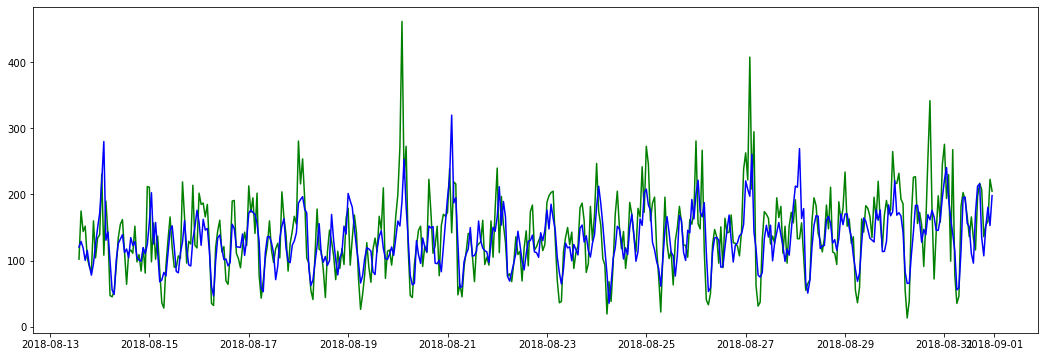

In [51]:
plt.figure(figsize=(18, 6))
plt.plot(target_test.index, target_test, 'g-', target_test.index, pred_lin_reg, 'b-')

In [66]:
dict_total["Linear Regression"].append(2.98)
dict_total["Linear Regression"].append(45.209)

### RandomForestRegressor

In [68]:
%%time
pred_many_tree = many_tree.predict(features_test)
print(f'RMSE на тестовой выборке = {rmse(target_test, pred_many_tree)}')

RMSE на тестовой выборке = 43.78534418188403
Wall time: 77 ms


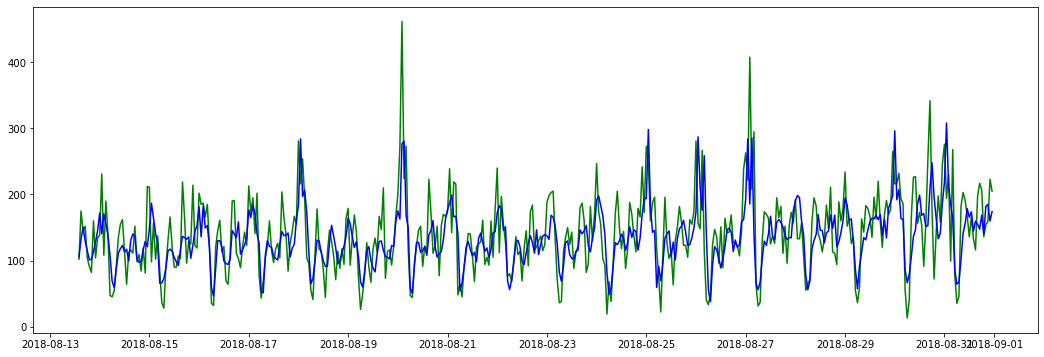

In [69]:
plt.figure(figsize=(18, 6))
plt.plot(target_test.index, target_test, 'g-', target_test.index, pred_many_tree, 'b-')

In [70]:
dict_total["RandomForestRegressor"].append(77)
dict_total["RandomForestRegressor"].append(43.785)

### CatBoostRegressor

In [76]:
%%time
pred_cat = model_cat.predict(features_test)
print(f'RMSE на тестовой выборке = {rmse(target_test, pred_cat)}')

RMSE на тестовой выборке = 43.889120920649425
Wall time: 6 ms


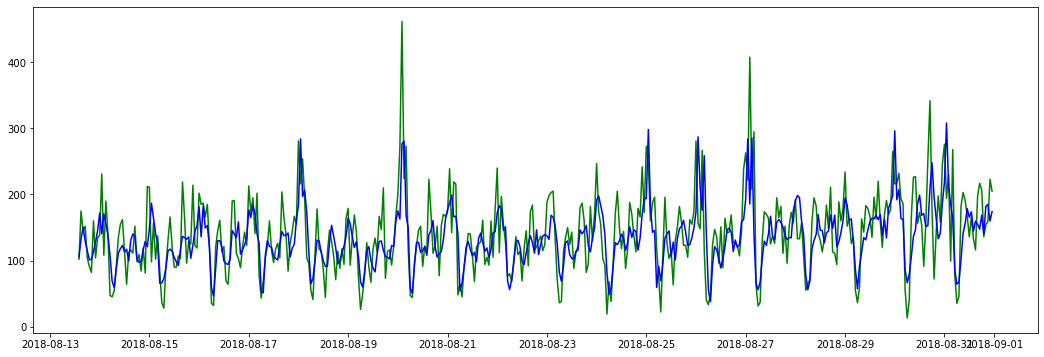

In [77]:
plt.figure(figsize=(18, 6))
plt.plot(target_test.index, target_test, 'g-', target_test.index, pred_many_tree, 'b-')

In [78]:
dict_total["CatBoostRegressor"].append(6)
dict_total["CatBoostRegressor"].append(43.889)

### LightGBMRegressor

In [79]:
%%time
pred_lgbm = model_lgbm.predict(features_test)
print(f'RMSE на тестовой выборке = {rmse(target_test, pred_lgbm)}')

RMSE на тестовой выборке = 47.23998050684959
Wall time: 22 ms


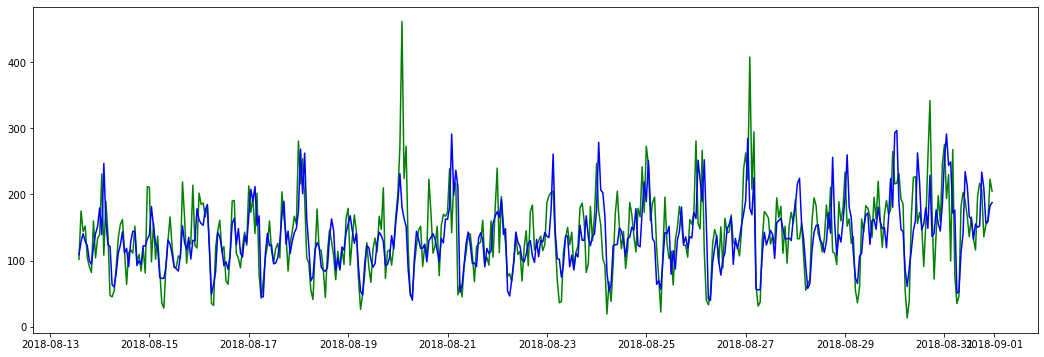

In [80]:
plt.figure(figsize=(18, 6))
plt.plot(target_test.index, target_test, 'g-', target_test.index, pred_lgbm, 'b-')

In [81]:
dict_total["LightGBMRegressor"].append(22)
dict_total["LightGBMRegressor"].append(47.24)

### DummyRegressor

In [82]:
%%time

print("RMSE тестовой выборке:", rmse(target_test, dummy_reg.predict(features_test)))

RMSE тестовой выборке: 87.15277582981295
Wall time: 979 µs


In [83]:
dict_total["DummyRegressor"].append(0.979)
dict_total["DummyRegressor"].append(87.153)

### Вывод

In [84]:
dict_total

{'Linear Regression': [8.97, 25.795, 2.98, 45.209],
 'RandomForestRegressor': [4980, 8.998, 77, 43.785],
 'CatBoostRegressor': [3890, 0.772, 6, 43.889],
 'LightGBMRegressor': [2510, 0.286, 22, 47.24],
 'DummyRegressor': [1, 38.838, 0.979, 87.153]}

In [85]:
df_total = pd.DataFrame.from_dict(dict_total, orient='index',
                       columns=["Время обучения, ms", "RMSE при обучении", "Время предсказания, ms", "RMSE итоговое"])

In [88]:
df_total['RMSE отношение'] = (df_total["RMSE итоговое"].min() / df_total["RMSE итоговое"])
df_total['Время обучения отношение'] = (df_total['Время обучения, ms'].min() / df_total['Время обучения, ms'])
df_total['Время предсказания отношение'] = (df_total['Время предсказания, ms'].min() / df_total['Время предсказания, ms'])
df_total['Итого'] = df_total['RMSE отношение']+ df_total['Время обучения отношение'] + df_total['Время предсказания отношение']
df_total['Подходит'] = df_total["RMSE итоговое"] < 48
df_total

,"Время обучения, ms",RMSE при обучении,"Время предсказания, ms",RMSE итоговое,RMSE отношение,Время обучения отношение,Время предсказания отношение,Итого,Подходит
Linear Regression,8.97,25.795,2.980,45.209,0.968502,0.111483,0.328523,1.408508,True
RandomForestRegressor,4980.00,8.998,77.000,43.785,1.000000,0.000201,0.012714,1.012915,True
CatBoostRegressor,3890.00,0.772,6.000,43.889,0.997630,0.000257,0.163167,1.161054,True
LightGBMRegressor,2510.00,0.286,22.000,47.240,0.926863,0.000398,0.044500,0.971761,True
DummyRegressor,1.00,38.838,0.979,87.153,0.502392,1.000000,1.000000,2.502392,False


## Вывод

Для того, чтобы спрогнозировать количество заказов такси на следующий час, были проанализированы данные о заказах, созданы новые признаки, которые отобразили тренды и сезонность, а также отстающие значения и скользящее среднее.

* Лучше всего показала себя модель CatBoost, так как она показала хорошую точность предсказания и время обучания/предсказания были не самые большие.
* Линейная регрессия показала точность меньше, но время обучения/предсказания были самые лучшие.
* Также модели прошли проверку на адекватность, т.к. случайная модель показала значение в 2 раза хуже.